<a href="https://colab.research.google.com/github/Ikhwan22/Tugas-Bisnis-Cerdas-4/blob/main/linear_regression_prediksi_biaya_asuransi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Biaya Pengobatan Pasien Berdasarkan Dataset Pribadi Biaya Medis**

# **Melakukan Import Package**
1. pandas untuk data analisis
2. numpy untuk numerical computing
3. scikit-learn / sklearn untuk machine learning
4. googl.colab untuk upload file dari local
5. matplotlib.pyplot untuk plotting 
6. seaborn untuk visualisasi data statistik

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import os

from google.colab import files
import io


# **Melakukan Upload File**
*   Terdapat beberapa cara dalam membaca file di google colab
*   Cara yang digunakan adalah membaca file melalui penyimpanan local



In [2]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


# **Membaca File 'insurance.csv' dengan Pandas Dataframe**
* File yang dibaca, akan diubah menjadi dataframe oleh pandas
* Dataframe merupakan struktur data 2 dimensi yang terdiri dari row dan column yang dapat dimodifikasi
* Inisialisasi nama adalah "df"



In [3]:
df = pd.read_csv(io.BytesIO(uploaded["insurance.csv"]))

# **Menampilkan Data**
* Data yang ditampilkan adalah 10 data pertama dari file 'insurance.csv' 




In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# **Menampilkan Deskripsi**
* Merangkum tendensi sentral, dispersi, dan bentuk distribusi kumpulan data, tidak termasuk nilai NaN.
* Menganalisis seri numerik dan objek, serta kumpulan kolom DataFrame dari tipe data campuran. 
* Data yang ditampilkan adalah:
> 1. Count
> 2. Mean
> 3. Standard Deviasi
> 4. Min
> 5. 25%
> 6. 50%
> 7. 75%
> 8. Max



In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Menampilkan Informasi**
Informasi yang ditampilkan:
> 1. Fitur / kolom dari dataset
> 2. Jumlah data yang tidak NULL
> 3. Tipe data dari fitur yang disediakan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Menampilkan Jumlah Data pada Dataset**
* Jumlah data = 1338 data
* Jumlah fitur = 7

In [7]:
print('Jumlah baris dan kolom dalam data set: ',df.shape)

Jumlah baris dan kolom dalam data set:  (1338, 7)


# **Membersihkan Kumpulan Data**
* Cek nilai data
* Jika terdapat data bernilai NULL, maka akan dijadikan 0
* Menampilkan jumlah data yang mengalami perubahan (diubah dari NULL menjadi 0)

In [8]:
# Check for null count column wise
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Memvisualisasikan Variabel Menggunakan Distplot**

* Variabel yang digunakan berasal dari fitur 'Charges'
* Ukuran gambar = 12 x 4
* Fungsi 'add_subplot' = Menambahkan Axes ke gambar saat ini.
* Fungsi 'distplot' Menggabungkan fungsi hist matplotlib (dengan perhitungan otomatis ukuran bin default yang baik) dengan fungsi kdeplot() dan rugplot() seaborn. Itu juga dapat memuat distribusi scipy.stats dan memplot perkiraan PDF di atas data.
* Menampilkan 2 grafik. Grafik yang berisi distribusi biasa, dan distribusi dalam skala log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


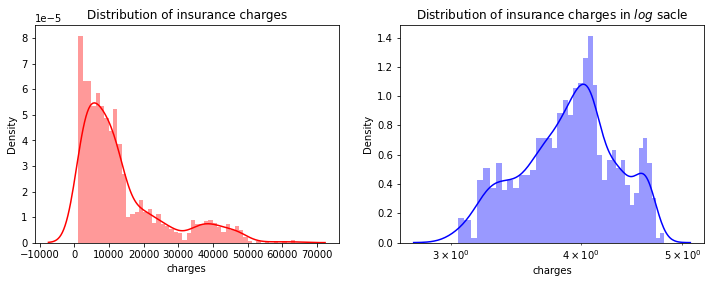

In [9]:
f   = plt.figure(figsize=(12,4))
ax  = f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax  = f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()

# **Memvisualisasikan Variabel Menggunakan 'barplot'**

* Variabel yang digunakan berasal dari fitur 'sex', 'smoker', dan 'region' berdasarkan fitur 'Charges'
- Ukuran gambar = 18 x 4
- Fungsi 'subplot' = Mengambil Axes yang ada

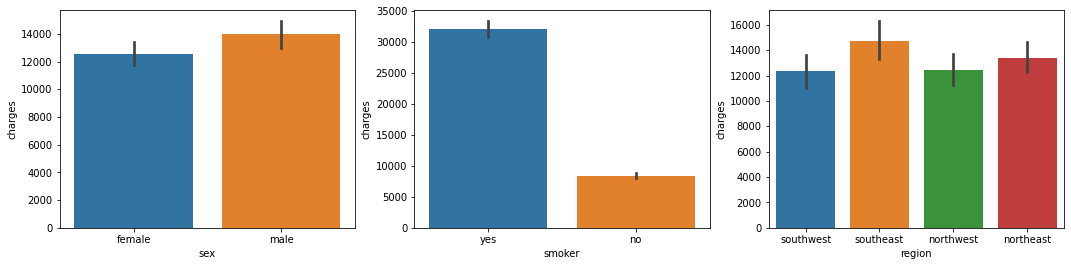

In [10]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

# **Memvisualsisasikan Data Numeric Menggunakan 'pairplot'**

- variabel yang digunakan berasal dari fitur 'age', 'bmi', 'children', dan 'charges'
- 'seaborn.pairplot' merupakan plot hubungan berpasangan dalam kumpulan data

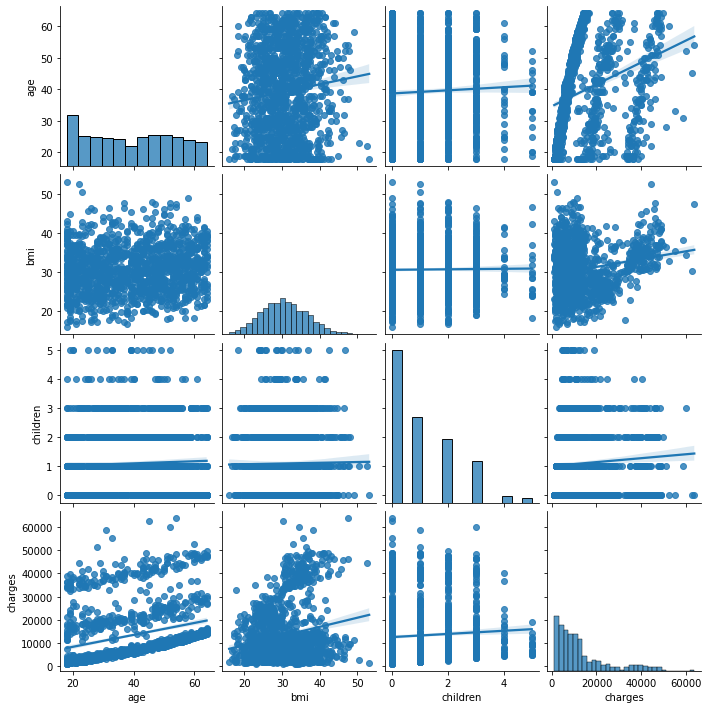

In [11]:
sns.pairplot(df,kind="reg")

# **Memvisualisasikan Data Menggunakan 'seabron.heatmap'**
- Fungsi 'seaborn.heatmap' adalah Plot data persegi panjang sebagai matriks yang disandikan warna
- Variabel yang ditampilkan berasal dari seluruh fitur

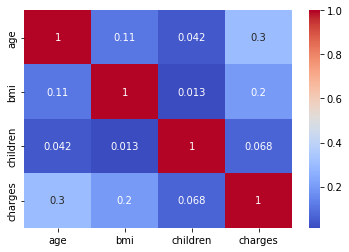

In [12]:

 #Plot a heatmap and look at the corelation
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

# **Encoding Label untuk Kategori Data**




Mengubah variabel yang berisi 2 hal menjadi 0 dan 1
- Data pertama yang diubah adalah variabel pada fitur 'sex'
> 1. Laki-laki = 1
> 2. Perempuan = 0
- Data kedua yang diubah adalah variabel pada fitur 'smoker'
> 1. Ya = 1
> 2. Tidak = 0

In [13]:
df['sex']    = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

Menetapkan variabel dummy ke variabel 'region' yang tersisa
1. Kolom/fitur 'region' dipecah menjadi sesuai dengan isinya
2. Kolom/fitur yang mengganti 'region' adalah 'region_northwest', 'region_southeast', 'region_soutwest'
3. Data yang berasal dari tempat tinggal tersebut diisi 1 dan tidak diisi 0
4. Menampilkan 5 data pertama dengan fungsi '.head'

In [14]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# **Model Training**
1. Pembuatan model klasifikasi, diperlukan pembagian data untuk proses training dan proses testing
2. Proses training merupakan proses untuk membentuk model dengan menggunakan data training
3. Proses testing merupakan proses untuk mengetes bagaimana performa dari model tersebut ketika diberikan data yang sebelumnya tidak pernah dilihat pada proses traning
4. 'X_train' dan 'y_train' akan digunakan sebagai proses training
5. 'X_test' digunakan sebagai data testing untuk prediksi
6. Hasil prediksi akan dibandingan dengan 'y_test'
7. Pembagian data nilai random state/bilangan acak yang diberikan = 0


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# **Linear Regression**
* Inisialisasi nama = 'lr'
* Melakukan training model dengan 'X_train' dan 'y_train'

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Menampilkan Skor Pengujian**
- Melakukan prediksi dengan model training dengan 'lr.predict' menggunakan data 'X_train'
- Melakukan prediksi pengujian dengan 'lr.predict' menggunakan data 'X_test'
- Menampilkan skor pengujian 

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014415


# **Membuat Fungsi dengan 'PolynomialFeature' dan Menampilkan Hasil**
- 'sklearn.preprocessing.PolynomialFeatures' untuk Menghasilkan polinomial dan fitur interaksi.
- Membentuk model training dan testing
- Melakukan prediksi (training dan testing)
- Menampilkan hasil testing



In [18]:
def polynomial_features_score(x_drop, y_drop):
  X = df.drop( [x_drop,'region_northwest','region_southeast','region_southwest'] , axis = 1)
  Y = y_drop

  quad = PolynomialFeatures (degree = 2)
  x_quad = quad.fit_transform(X)

  X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state = 0)

  plr = LinearRegression().fit(X_train,Y_train)

  Y_train_pred = plr.predict(X_train)
  Y_test_pred = plr.predict(X_test)

  linear_score = plr.score(X_test, Y_test)

  return print(linear_score)

# **BMI**

In [19]:
x_drop_bmi = 'bmi'
y_drop_bmi = df.bmi

polynomial_features_score(x_drop_bmi, y_drop_bmi)

0.15400804414822533


# **Children**

In [20]:
x_drop_children = 'children'
y_drop_children = df.children

polynomial_features_score(x_drop_children, y_drop_children)

0.13563844603471964


# **Smoker**

In [21]:
x_drop_smoker = 'smoker'
y_drop_smoker = df.smoker

polynomial_features_score(x_drop_smoker, y_drop_smoker)

0.7775177839188638


# **Charges**

In [22]:
x_drop_charges = 'charges'
y_drop_charges = df.charges

polynomial_features_score(x_drop_charges, y_drop_charges)

0.8849197344147228


# **Sex**

In [23]:
x_drop_sex = 'sex'
y_drop_sex = df.sex

polynomial_features_score(x_drop_sex, y_drop_sex)

0.009967450644672637


# **Age**

In [24]:
x_drop_age = 'age'
y_drop_age = df.age

polynomial_features_score(x_drop_age, y_drop_age)

0.5220685679680568
